# 상품코드별 통계 분석

ENTR_BY_INS.csv 파일의 상품코드별 통계를 생성하고 MVNO_PRD_PLC.csv의 요금제 정보와 병합하여 분석합니다.


In [22]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("📊 상품코드별 통계 분석 프로그램")
print("=" * 60)


📊 상품코드별 통계 분석 프로그램


In [23]:
# 데이터 로드
print("📁 데이터 로드 중...")

# ENTR_BY_INS.csv 로드 (M-2 정산내역)
try:
    df_entr = pd.read_csv('csv/ENTR_BY_INS.csv', encoding='cp949')
    print(f"✅ ENTR_BY_INS.csv 로드 완료: {df_entr.shape[0]:,}행 × {df_entr.shape[1]}열")
except Exception as e:
    print(f"❌ ENTR_BY_INS.csv 로드 실패: {e}")

# MVNO_PRD_PLC.csv 로드 (요금제 정보)
try:
    df_plan = pd.read_csv('csv/MVNO_PRD_PLC.csv', encoding='utf-8')
    print(f"✅ MVNO_PRD_PLC.csv 로드 완료: {df_plan.shape[0]:,}행 × {df_plan.shape[1]}열")
except Exception as e:
    print(f"❌ MVNO_PRD_PLC.csv 로드 실패: {e}")

print(f"\n📋 데이터 로드 완료!")


📁 데이터 로드 중...
✅ ENTR_BY_INS.csv 로드 완료: 270,192행 × 111열
✅ MVNO_PRD_PLC.csv 로드 완료: 138행 × 9열

📋 데이터 로드 완료!


In [24]:
# 데이터 기본 정보 확인
print("📊 데이터 기본 정보")
print("=" * 50)

print(f"\n🔍 ENTR_BY_INS.csv (정산내역):")
print(f"  - 총 행 수: {df_entr.shape[0]:,}")
print(f"  - 총 열 수: {df_entr.shape[1]}")
print(f"  - 메모리 사용량: {df_entr.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n🔍 MVNO_PRD_PLC.csv (요금제 정보):")
print(f"  - 총 행 수: {df_plan.shape[0]:,}")
print(f"  - 총 열 수: {df_plan.shape[1]}")
print(f"  - 메모리 사용량: {df_plan.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 상품코드 관련 컬럼 확인
print(f"\n📋 상품코드 관련 컬럼:")
entr_product_cols = [col for col in df_entr.columns if '상품' in col or '코드' in col]
print(f"  - ENTR_BY_INS: {entr_product_cols}")

plan_product_cols = [col for col in df_plan.columns if '상품' in col or '코드' in col or '요금제' in col]
print(f"  - MVNO_PRD_PLC: {plan_product_cols}")


📊 데이터 기본 정보

🔍 ENTR_BY_INS.csv (정산내역):
  - 총 행 수: 270,192
  - 총 열 수: 111
  - 메모리 사용량: 462.30 MB

🔍 MVNO_PRD_PLC.csv (요금제 정보):
  - 총 행 수: 138
  - 총 열 수: 9
  - 메모리 사용량: 0.04 MB

📋 상품코드 관련 컬럼:
  - ENTR_BY_INS: ['MVNO상품코드', 'MVNO상품명', '마켓코드', '가입대리점코드', '실판매점코드', '정산상품코드', '정산상품명', '83.데이터선구매상품명']
  - MVNO_PRD_PLC: ['요금제코드', '요금제명']


In [25]:
# 상품코드별 기본 통계 생성
print("📈 상품코드별 기본 통계 생성")
print("=" * 50)

# ENTR_BY_INS에서 상품코드별 통계
if 'MVNO상품코드' in df_entr.columns:
    product_stats = df_entr.groupby('MVNO상품코드').agg({
        '가입번호': 'count',                    # 가입자 수
        '수납금액': ['sum', 'mean', 'std'],     # 수납금액 통계
        '도매대가합계(1~24+82)': ['sum', 'mean', 'std'],  # 도매대가 통계
        '38.기본료': ['sum', 'mean', 'std'],    # 기본료 통계
        '74.데이타_총사용금액': ['sum', 'mean', 'std'],  # 데이터 사용금액 통계
        '41.음성통화_총사용금액': ['sum', 'mean', 'std'],  # 음성통화 사용금액 통계
        '51.SMS_총사용금액': ['sum', 'mean', 'std']  # SMS 사용금액 통계
    }).round(2)
    
    # 컬럼명 정리
    product_stats.columns = [
        '가입자수', '수납금액_합계', '수납금액_평균', '수납금액_표준편차',
        '도매대가_합계', '도매대가_평균', '도매대가_표준편차',
        '기본료_합계', '기본료_평균', '기본료_표준편차',
        '데이터사용금액_합계', '데이터사용금액_평균', '데이터사용금액_표준편차',
        '음성통화금액_합계', '음성통화금액_평균', '음성통화금액_표준편차',
        'SMS금액_합계', 'SMS금액_평균', 'SMS금액_표준편차'
    ]
    
    print(f"✅ 상품코드별 통계 생성 완료: {len(product_stats)}개 상품")
    print(f"\n📊 상품코드별 기본 통계 (상위 10개):")
    print(product_stats.head(10))
    
else:
    print("❌ MVNO상품코드 컬럼을 찾을 수 없습니다.")
    print(f"사용 가능한 컬럼: {list(df_entr.columns)}")


📈 상품코드별 기본 통계 생성
✅ 상품코드별 통계 생성 완료: 138개 상품

📊 상품코드별 기본 통계 (상위 10개):
             가입자수  수납금액_합계  수납금액_평균  수납금액_표준편차       도매대가_합계   도매대가_평균  \
MVNO상품코드                                                                 
LPZ0002633  15876      0.0      0.0        0.0  1.995666e+08  12570.33   
LPZ0002635      2      0.0      0.0        0.0  2.369612e+04  11848.06   
LPZ0002637      1      0.0      0.0        NaN  2.155718e+04  21557.18   
LPZ0002638    159      0.0      0.0        0.0  2.551214e+06  16045.37   
LPZ0002639    646      0.0      0.0        0.0  1.467163e+07  22711.50   
LPZ0002640      2      0.0      0.0        0.0  3.902971e+04  19514.85   
LPZ0002641    494      0.0      0.0        0.0  1.562619e+07  31631.97   
LPZ0002642  78510      0.0      0.0        0.0  2.182089e+07    277.94   
LPZ0002644    937      0.0      0.0        0.0  4.689010e+06   5004.28   
LPZ0002742    275      0.0      0.0        0.0  4.815233e+06  17509.94   

            도매대가_표준편차       기본료_합계   기본료_평균

In [26]:
# 요금제 정보와 병합
print("\n🔗 요금제 정보와 병합")
print("=" * 50)

if 'MVNO상품코드' in df_entr.columns and '요금제코드' in df_plan.columns:
    # 요금제 정보와 병합
    merged_stats = product_stats.reset_index().merge(
        df_plan[['요금제코드', '요금제명', '기본료', '평생할인', '기간할인', '이벤트가', '정책금']], 
        left_on='MVNO상품코드', 
        right_on='요금제코드', 
        how='left'
    )
    
    print(f"✅ 요금제 정보 병합 완료: {len(merged_stats)}개 상품")
    print(f"\n📊 병합된 상품 통계 (상위 10개):")
    display_cols = ['MVNO상품코드', '요금제명', '가입자수', '수납금액_합계', '수납금액_평균', '기본료']
    print(merged_stats[display_cols].head(10))
    
else:
    print("❌ 병합할 수 있는 컬럼을 찾을 수 없습니다.")
    print(f"ENTR_BY_INS 컬럼: {[col for col in df_entr.columns if '상품' in col or '코드' in col]}")
    print(f"MVNO_PRD_PLC 컬럼: {[col for col in df_plan.columns if '상품' in col or '코드' in col or '요금제' in col]}")



🔗 요금제 정보와 병합
✅ 요금제 정보 병합 완료: 138개 상품

📊 병합된 상품 통계 (상위 10개):
     MVNO상품코드                         요금제명   가입자수  수납금액_합계  수납금액_평균  기본료
0  LPZ0002633           [INS]인스 선불정액 300MB  15876      0.0      0.0    0
1  LPZ0002635      [INS]인스 선불정액 300MB+(국제)      2      0.0      0.0    0
2  LPZ0002637             [INS]인스 정액선불 10G      1      0.0      0.0    0
3  LPZ0002638           [INS]인스 정액선불 15GB+    159      0.0      0.0    0
4  LPZ0002639            [INS]인스 정액선불 11G+    646      0.0      0.0    0
5  LPZ0002640        [INS]인스 정액선불 11G+(국제)      2      0.0      0.0    0
6  LPZ0002641          [INS]인스 데이터 프리미엄 선불    494      0.0      0.0    0
7  LPZ0002642              [INS]인스 LTE선불표준  78510      0.0      0.0    0
8  LPZ0002644     [INS]인스 선불정액 300MB+1Mbps    937      0.0      0.0    0
9  LPZ0002742  선불정액363(10.3GB+3Mbps)_인스코리아    275      0.0      0.0    0


In [27]:
# 상품코드별 상세 분석
print("\n📊 상품코드별 상세 분석")
print("=" * 50)

if 'MVNO상품코드' in df_entr.columns:
    # 1. 가입자 수 기준 상위 상품
    print("🏆 가입자 수 기준 상위 10개 상품:")
    top_products = product_stats.nlargest(10, '가입자수')[['가입자수', '수납금액_합계', '수납금액_평균']]
    print(top_products)
    
    # 2. 수납금액 합계 기준 상위 상품
    print(f"\n💰 수납금액 합계 기준 상위 10개 상품:")
    top_revenue = product_stats.nlargest(10, '수납금액_합계')[['가입자수', '수납금액_합계', '수납금액_평균']]
    print(top_revenue)
    
    # 3. 수납금액 평균 기준 상위 상품
    print(f"\n💎 수납금액 평균 기준 상위 10개 상품:")
    top_avg_revenue = product_stats.nlargest(10, '수납금액_평균')[['가입자수', '수납금액_합계', '수납금액_평균']]
    print(top_avg_revenue)
    
    # 4. 전체 통계 요약
    print(f"\n📈 전체 통계 요약:")
    total_stats = {
        '총 상품 수': len(product_stats),
        '총 가입자 수': product_stats['가입자수'].sum(),
        '총 수납금액': product_stats['수납금액_합계'].sum(),
        '평균 수납금액': product_stats['수납금액_평균'].mean(),
        '최대 수납금액': product_stats['수납금액_합계'].max(),
        '최소 수납금액': product_stats['수납금액_합계'].min()
    }
    
    for key, value in total_stats.items():
        if isinstance(value, float):
            print(f"  - {key}: {value:,.2f}")
        else:
            print(f"  - {key}: {value:,}")



📊 상품코드별 상세 분석
🏆 가입자 수 기준 상위 10개 상품:
                가입자수      수납금액_합계   수납금액_평균
MVNO상품코드                                   
LPZ0002642     78510          0.0      0.00
PNP0000000004  54967          0.0      0.00
LPZ0002633     15876          0.0      0.00
LPZ0012503     14594  347694818.5  23824.50
LPZ0012327     11539   99692308.2   8639.60
LPZ0017308      8118  173360628.8  21355.09
LPZ0017301      7967  240823375.0  30227.61
LPZ0018262      7957  118736531.6  14922.27
LPZ0012500      6372  153248044.0  24050.23
LPZ0010136      5464          0.0      0.00

💰 수납금액 합계 기준 상위 10개 상품:
             가입자수      수납금액_합계   수납금액_평균
MVNO상품코드                                
LPZ0012503  14594  347694818.5  23824.50
LPZ0017301   7967  240823375.0  30227.61
LPZ0017308   8118  173360628.8  21355.09
LPZ0012500   6372  153248044.0  24050.23
LPZ0012313   4115  118970546.1  28911.43
LPZ0018262   7957  118736531.6  14922.27
LPZ0012507   3386  100951521.9  29814.39
LPZ0012327  11539   99692308.2   8639.60



📊 시각화 생성


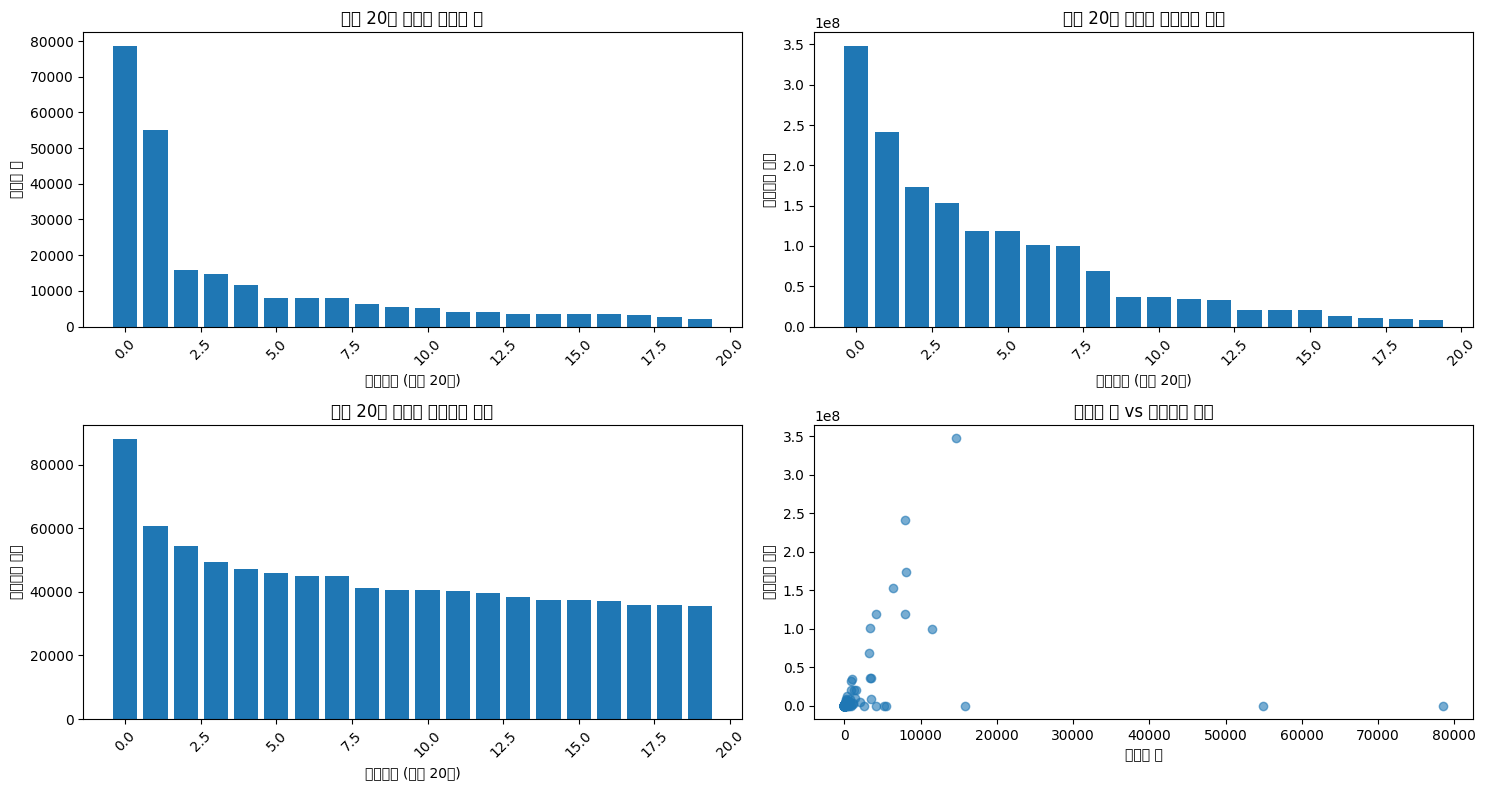

✅ 시각화 완료!


In [28]:
# 시각화
print("\n📊 시각화 생성")
print("=" * 50)

if 'MVNO상품코드' in df_entr.columns:
    # 1. 가입자 수 분포 (상위 20개)
    plt.figure(figsize=(15, 8))
    
    plt.subplot(2, 2, 1)
    top_20_products = product_stats.nlargest(20, '가입자수')
    plt.bar(range(len(top_20_products)), top_20_products['가입자수'])
    plt.title('상위 20개 상품별 가입자 수')
    plt.xlabel('상품코드 (상위 20개)')
    plt.ylabel('가입자 수')
    plt.xticks(rotation=45)
    
    # 2. 수납금액 합계 분포 (상위 20개)
    plt.subplot(2, 2, 2)
    top_20_revenue = product_stats.nlargest(20, '수납금액_합계')
    plt.bar(range(len(top_20_revenue)), top_20_revenue['수납금액_합계'])
    plt.title('상위 20개 상품별 수납금액 합계')
    plt.xlabel('상품코드 (상위 20개)')
    plt.ylabel('수납금액 합계')
    plt.xticks(rotation=45)
    
    # 3. 수납금액 평균 분포 (상위 20개)
    plt.subplot(2, 2, 3)
    top_20_avg = product_stats.nlargest(20, '수납금액_평균')
    plt.bar(range(len(top_20_avg)), top_20_avg['수납금액_평균'])
    plt.title('상위 20개 상품별 수납금액 평균')
    plt.xlabel('상품코드 (상위 20개)')
    plt.ylabel('수납금액 평균')
    plt.xticks(rotation=45)
    
    # 4. 가입자 수 vs 수납금액 산점도
    plt.subplot(2, 2, 4)
    plt.scatter(product_stats['가입자수'], product_stats['수납금액_합계'], alpha=0.6)
    plt.title('가입자 수 vs 수납금액 합계')
    plt.xlabel('가입자 수')
    plt.ylabel('수납금액 합계')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ 시각화 완료!")



📊 Plotly 인터랙티브 차트 생성


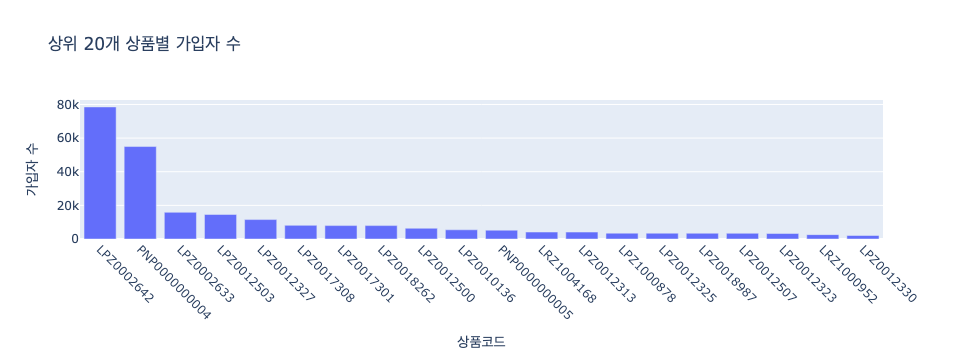

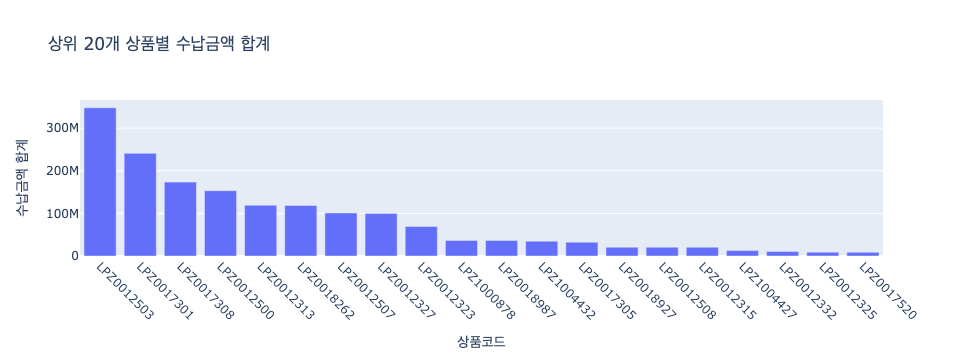

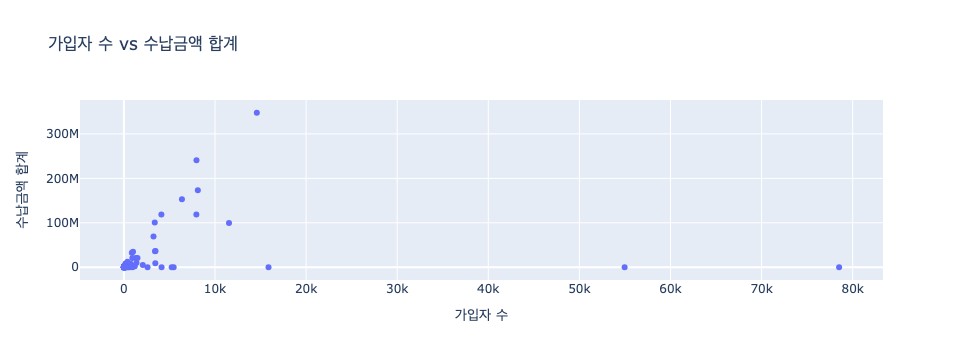

✅ Plotly 차트 생성 완료!


In [29]:
# Plotly 인터랙티브 차트
print("\n📊 Plotly 인터랙티브 차트 생성")
print("=" * 50)

if 'MVNO상품코드' in df_entr.columns:
    # 1. 가입자 수 기준 상위 20개 상품
    top_20_products = product_stats.nlargest(20, '가입자수').reset_index()
    
    fig1 = px.bar(
        top_20_products, 
        x='MVNO상품코드', 
        y='가입자수',
        title='상위 20개 상품별 가입자 수',
        labels={'가입자수': '가입자 수', 'MVNO상품코드': '상품코드'}
    )
    fig1.update_xaxes(tickangle=45)
    fig1.show()
    
    # 2. 수납금액 합계 기준 상위 20개 상품
    top_20_revenue = product_stats.nlargest(20, '수납금액_합계').reset_index()
    
    fig2 = px.bar(
        top_20_revenue, 
        x='MVNO상품코드', 
        y='수납금액_합계',
        title='상위 20개 상품별 수납금액 합계',
        labels={'수납금액_합계': '수납금액 합계', 'MVNO상품코드': '상품코드'}
    )
    fig2.update_xaxes(tickangle=45)
    fig2.show()
    
    # 3. 가입자 수 vs 수납금액 산점도 (인터랙티브)
    fig3 = px.scatter(
        product_stats.reset_index(),
        x='가입자수',
        y='수납금액_합계',
        hover_data=['MVNO상품코드', '수납금액_평균'],
        title='가입자 수 vs 수납금액 합계',
        labels={'가입자수': '가입자 수', '수납금액_합계': '수납금액 합계'}
    )
    fig3.show()
    
    print("✅ Plotly 차트 생성 완료!")


In [30]:
# 상세 통계 테이블 생성
print("\n📋 상세 통계 테이블 생성")
print("=" * 50)

if 'MVNO상품코드' in df_entr.columns:
    # 상세 통계 테이블
    detailed_stats = product_stats.copy()
    detailed_stats = detailed_stats.reset_index()
    
    # 추가 계산 컬럼
    detailed_stats['수납금액_총합_비율(%)'] = (detailed_stats['수납금액_합계'] / detailed_stats['수납금액_합계'].sum() * 100).round(2)
    detailed_stats['가입자수_비율(%)'] = (detailed_stats['가입자수'] / detailed_stats['가입자수'].sum() * 100).round(2)
    detailed_stats['상품당_평균수납금액'] = (detailed_stats['수납금액_합계'] / detailed_stats['가입자수']).round(2)
    
    # 정렬 (가입자 수 기준)
    detailed_stats = detailed_stats.sort_values('가입자수', ascending=False)
    
    print("📊 상세 통계 테이블 (상위 15개):")
    display_cols = [
        'MVNO상품코드', '가입자수', '가입자수_비율(%)', 
        '수납금액_합계', '수납금액_평균', '수납금액_총합_비율(%)',
        '상품당_평균수납금액'
    ]
    print(detailed_stats[display_cols].head(15).to_string(index=False))
    
    print(f"\n📈 전체 요약:")
    print(f"  - 총 상품 수: {len(detailed_stats):,}개")
    print(f"  - 총 가입자 수: {detailed_stats['가입자수'].sum():,}명")
    print(f"  - 총 수납금액: {detailed_stats['수납금액_합계'].sum():,.2f}원")
    print(f"  - 평균 상품당 가입자 수: {detailed_stats['가입자수'].mean():.1f}명")
    print(f"  - 평균 상품당 수납금액: {detailed_stats['수납금액_합계'].mean():,.2f}원")



📋 상세 통계 테이블 생성
📊 상세 통계 테이블 (상위 15개):
     MVNO상품코드  가입자수  가입자수_비율(%)     수납금액_합계  수납금액_평균  수납금액_총합_비율(%)  상품당_평균수납금액
   LPZ0002642 78510       29.06         0.0     0.00           0.00        0.00
PNP0000000004 54967       20.34         0.0     0.00           0.00        0.00
   LPZ0002633 15876        5.88         0.0     0.00           0.00        0.00
   LPZ0012503 14594        5.40 347694818.5 23824.50          19.50    23824.50
   LPZ0012327 11539        4.27  99692308.2  8639.60           5.59     8639.60
   LPZ0017308  8118        3.00 173360628.8 21355.09           9.72    21355.09
   LPZ0017301  7967        2.95 240823375.0 30227.61          13.51    30227.61
   LPZ0018262  7957        2.94 118736531.6 14922.27           6.66    14922.27
   LPZ0012500  6372        2.36 153248044.0 24050.23           8.59    24050.23
   LPZ0010136  5464        2.02         0.0     0.00           0.00        0.00
PNP0000000005  5247        1.94         0.0     0.00           0.00        0.00
  

In [ ]:
# 결과를 CSV 파일로 저장
print("\n💾 결과 저장")
print("=" * 50)

if 'MVNO상품코드' in df_entr.columns:
    try:
        # 상품코드별 통계 저장
        product_stats.to_csv('product_statistics.csv', encoding='utf-8')
        print("✅ product_statistics.csv 저장 완료")
        
        # 상세 통계 저장
        detailed_stats.to_csv('detailed_product_statistics.csv', encoding='utf-8')
        print("✅ detailed_product_statistics.csv 저장 완료")
        
        # 요금제 정보와 병합된 결과 저장 (가능한 경우)
        if 'merged_stats' in locals():
            merged_stats.to_csv('merged_product_statistics.csv', encoding='utf-8')
            print("✅ merged_product_statistics.csv 저장 완료")
        
        # ENTR_BY_INS와 MVNO_PRD_PLC 병합 파일 저장 (가능한 경우)
        if 'merged_df' in locals():
            merged_df.to_csv('ENTR_BY_INS_MERGE.csv', index=False, encoding='utf-8')
            print("✅ ENTR_BY_INS_MERGE.csv 저장 완료")
        
        # 공통 고객 관련 파일들 저장 (가능한 경우)
        if 'common_numbers' in locals() and len(common_numbers) > 0:
            if 'entr_by_common' in locals():
                entr_by_common.to_csv('common_customers_entr_by.csv', index=False, encoding='utf-8')
                print("✅ common_customers_entr_by.csv 저장 완료")
            if 'entr_int_common' in locals():
                entr_int_common.to_csv('common_customers_entr_int.csv', index=False, encoding='utf-8')
                print("✅ common_customers_entr_int.csv 저장 완료")
            if 'summary_df' in locals():
                summary_df.to_csv('common_customers_summary.csv', index=False, encoding='utf-8')
                print("✅ common_customers_summary.csv 저장 완료")
        
        print(f"\n📁 저장된 파일:")
        print(f"  - product_statistics.csv: 기본 상품코드별 통계")
        print(f"  - detailed_product_statistics.csv: 상세 통계 (비율 포함)")
        if 'merged_stats' in locals():
            print(f"  - merged_product_statistics.csv: 요금제 정보 병합 결과")
        if 'merged_df' in locals():
            print(f"  - ENTR_BY_INS_MERGE.csv: ENTR_BY_INS + MVNO_PRD_PLC 병합 데이터")
        if 'common_numbers' in locals() and len(common_numbers) > 0:
            print(f"  - common_customers_entr_by.csv: 공통 고객 (ENTR_BY_INS)")
            print(f"  - common_customers_entr_int.csv: 공통 고객 (ENTR_INT_INS)")
            print(f"  - common_customers_summary.csv: 공통 고객 요약 정보")
            
    except Exception as e:
        print(f"❌ 파일 저장 중 오류: {e}")

print(f"\n🎉 상품코드별 통계 분석 및 데이터 병합 완료!")



💾 결과 저장
✅ product_statistics.csv 저장 완료
✅ detailed_product_statistics.csv 저장 완료
✅ merged_product_statistics.csv 저장 완료

📁 저장된 파일:
  - product_statistics.csv: 기본 상품코드별 통계
  - detailed_product_statistics.csv: 상세 통계 (비율 포함)
  - merged_product_statistics.csv: 요금제 정보 병합 결과

🎉 상품코드별 통계 분석 및 데이터 병합 완료!


In [32]:
# ENTR_BY_INS.csv와 MVNO_PRD_PLC.csv 매핑하여 새로운 CSV 생성
print("\n🔗 데이터 매핑 및 병합")
print("=" * 50)

if 'MVNO상품코드' in df_entr.columns and '요금제코드' in df_plan.columns:
    print("📊 원본 데이터 정보:")
    print(f"  - ENTR_BY_INS.csv: {df_entr.shape[0]:,}행 × {df_entr.shape[1]}열")
    print(f"  - MVNO_PRD_PLC.csv: {df_plan.shape[0]:,}행 × {df_plan.shape[1]}열")
    
    # 요금제 정보와 병합
    print("\n🔄 데이터 병합 중...")
    merged_df = df_entr.merge(
        df_plan[['요금제코드', '요금제명', '기본료', '평생할인', '기간할인', '이벤트가', '정책금', '정책반영시작일', '정책반영종료일']], 
        left_on='MVNO상품코드', 
        right_on='요금제코드', 
        how='left'
    )
    
    print(f"✅ 데이터 병합 완료: {merged_df.shape[0]:,}행 × {merged_df.shape[1]}열")
    
    # 매핑 결과 확인
    print(f"\n📋 매핑 결과:")
    matched_count = merged_df['요금제코드'].notna().sum()
    unmatched_count = merged_df['요금제코드'].isna().sum()
    total_count = len(merged_df)
    
    print(f"  - 매핑 성공: {matched_count:,}건 ({matched_count/total_count*100:.1f}%)")
    print(f"  - 매핑 실패: {unmatched_count:,}건 ({unmatched_count/total_count*100:.1f}%)")
    
    # 매핑되지 않은 상품코드 확인
    if unmatched_count > 0:
        unmatched_products = merged_df[merged_df['요금제코드'].isna()]['MVNO상품코드'].unique()
        print(f"\n⚠️ 매핑되지 않은 상품코드 ({len(unmatched_products)}개):")
        for i, product in enumerate(unmatched_products[:10]):  # 상위 10개만 표시
            print(f"  {i+1}. {product}")
        if len(unmatched_products) > 10:
            print(f"  ... 외 {len(unmatched_products) - 10}개")
    
    # 병합된 데이터를 CSV 파일로 저장
    print(f"\n💾 ENTR_BY_INS_MERGE.csv 저장 중...")
    try:
        merged_df.to_csv('ENTR_BY_INS_MERGE.csv', index=False, encoding='utf-8')
        print("✅ ENTR_BY_INS_MERGE.csv 저장 완료")
        
        # 저장된 파일 정보
        import os
        file_size = os.path.getsize('ENTR_BY_INS_MERGE.csv') / (1024 * 1024)  # MB
        print(f"📁 파일 정보:")
        print(f"  - 파일명: ENTR_BY_INS_MERGE.csv")
        print(f"  - 크기: {file_size:.2f} MB")
        print(f"  - 행 수: {merged_df.shape[0]:,}")
        print(f"  - 열 수: {merged_df.shape[1]}")
        
        # 추가된 컬럼 정보
        added_columns = ['요금제코드', '요금제명', '기본료', '평생할인', '기간할인', '이벤트가', '정책금', '정책반영시작일', '정책반영종료일']
        print(f"\n📋 추가된 컬럼 ({len(added_columns)}개):")
        for col in added_columns:
            if col in merged_df.columns:
                print(f"  - {col}")
        
    except Exception as e:
        print(f"❌ 파일 저장 중 오류: {e}")
        
else:
    print("❌ 매핑할 수 있는 컬럼을 찾을 수 없습니다.")
    print(f"ENTR_BY_INS 컬럼: {[col for col in df_entr.columns if '상품' in col or '코드' in col]}")
    print(f"MVNO_PRD_PLC 컬럼: {[col for col in df_plan.columns if '상품' in col or '코드' in col or '요금제' in col]}")



🔗 데이터 매핑 및 병합
📊 원본 데이터 정보:
  - ENTR_BY_INS.csv: 270,192행 × 111열
  - MVNO_PRD_PLC.csv: 138행 × 9열

🔄 데이터 병합 중...
✅ 데이터 병합 완료: 270,192행 × 120열

📋 매핑 결과:
  - 매핑 성공: 270,192건 (100.0%)
  - 매핑 실패: 0건 (0.0%)

💾 ENTR_BY_INS_MERGE.csv 저장 중...
✅ ENTR_BY_INS_MERGE.csv 저장 완료
📁 파일 정보:
  - 파일명: ENTR_BY_INS_MERGE.csv
  - 크기: 188.89 MB
  - 행 수: 270,192
  - 열 수: 120

📋 추가된 컬럼 (9개):
  - 요금제코드
  - 요금제명
  - 기본료
  - 평생할인
  - 기간할인
  - 이벤트가
  - 정책금
  - 정책반영시작일
  - 정책반영종료일


In [33]:
# 병합된 데이터 샘플 확인
print("\n📊 병합된 데이터 샘플 확인")
print("=" * 50)

if 'merged_df' in locals():
    print("🔍 병합된 데이터 샘플 (상위 5개):")
    print("-" * 80)
    
    # 주요 컬럼만 선택하여 표시
    display_columns = [
        'MVNO상품코드', 'MVNO상품명', '요금제코드', '요금제명', 
        '가입번호', '고객명', '수납금액', '기본료', '평생할인', '기간할인'
    ]
    
    # 존재하는 컬럼만 선택
    available_columns = [col for col in display_columns if col in merged_df.columns]
    sample_data = merged_df[available_columns].head(5)
    
    print(sample_data.to_string(index=False))
    
    print(f"\n📈 병합된 데이터 통계:")
    print(f"  - 총 행 수: {merged_df.shape[0]:,}")
    print(f"  - 총 열 수: {merged_df.shape[1]}")
    print(f"  - 메모리 사용량: {merged_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # 매핑된 요금제별 통계
    if '요금제명' in merged_df.columns:
        print(f"\n📋 매핑된 요금제별 통계:")
        plan_stats = merged_df.groupby('요금제명').agg({
            '가입번호': 'count',
            '수납금액': ['sum', 'mean']
        }).round(2)
        
        plan_stats.columns = ['가입자수', '수납금액_합계', '수납금액_평균']
        plan_stats = plan_stats.sort_values('가입자수', ascending=False)
        
        print("상위 10개 요금제:")
        print(plan_stats.head(10).to_string())
    
    print(f"\n✅ ENTR_BY_INS_MERGE.csv 파일이 성공적으로 생성되었습니다!")
    
else:
    print("❌ 병합된 데이터가 없습니다. 이전 셀을 먼저 실행하세요.")



📊 병합된 데이터 샘플 확인
🔍 병합된 데이터 샘플 (상위 5개):
--------------------------------------------------------------------------------
  MVNO상품코드            MVNO상품명      요금제코드               요금제명         가입번호   고객명  수납금액  기본료  평생할인  기간할인
LPZ0002633 [INS]인스 선불정액 300MB LPZ0002633 [INS]인스 선불정액 300MB 500224238285 S*N*S   0.0    0     0     0
LPZ0002633 [INS]인스 선불정액 300MB LPZ0002633 [INS]인스 선불정액 300MB 500224410560  S*N*   0.0    0     0     0
LPZ0002633 [INS]인스 선불정액 300MB LPZ0002633 [INS]인스 선불정액 300MB 500224446685 H*E*G   0.0    0     0     0
LPZ0002633 [INS]인스 선불정액 300MB LPZ0002633 [INS]인스 선불정액 300MB 500224853447   장*덕   0.0    0     0     0
LPZ0002633 [INS]인스 선불정액 300MB LPZ0002633 [INS]인스 선불정액 300MB 500224979670 C*H*Y   0.0    0     0     0

📈 병합된 데이터 통계:
  - 총 행 수: 270,192
  - 총 열 수: 120
  - 메모리 사용량: 544.58 MB

📋 매핑된 요금제별 통계:
상위 10개 요금제:
                                   가입자수      수납금액_합계   수납금액_평균
요금제명                                                          
[INS]인스 LTE선불표준                   78510   

## 📊 분석 결과 요약

이 노트북은 다음과 같은 분석을 수행합니다:

1. **데이터 로드**: ENTR_BY_INS.csv, ENTR_INT_INS.csv, MVNO_PRD_PLC.csv 파일 로드
2. **상품코드별 통계**: 가입자 수, 수납금액, 도매대가, 기본료 등 다양한 지표 계산
3. **요금제 정보 병합**: 상품코드와 요금제 정보 연결
4. **데이터 매핑**: ENTR_BY_INS.csv와 MVNO_PRD_PLC.csv를 매핑하여 새로운 CSV 생성
5. **동일 고객 분석**: ENTR_BY_INS.csv와 ENTR_INT_INS.csv 간 공통 고객 확인 및 분석
6. **시각화**: matplotlib과 plotly를 활용한 다양한 차트 생성
7. **결과 저장**: 분석 결과를 CSV 파일로 저장

### 주요 출력 파일:
- `product_statistics.csv`: 기본 상품코드별 통계
- `detailed_product_statistics.csv`: 상세 통계 (비율 포함)
- `merged_product_statistics.csv`: 요금제 정보 병합 결과
- `ENTR_BY_INS_MERGE.csv`: ENTR_BY_INS + MVNO_PRD_PLC 병합 데이터
- `common_customers_entr_by.csv`: 공통 고객 (ENTR_BY_INS)
- `common_customers_entr_int.csv`: 공통 고객 (ENTR_INT_INS)
- `common_customers_summary.csv`: 공통 고객 요약 정보

### 🔗 데이터 매핑 정보:
- **매핑 키**: MVNO상품코드 ↔ 요금제코드
- **추가된 컬럼**: 요금제명, 기본료, 평생할인, 기간할인, 이벤트가, 정책금, 정책반영시작일, 정책반영종료일
- **매핑 방식**: LEFT JOIN (모든 ENTR_BY_INS 데이터 유지)

### 👥 동일 고객 분석 정보:
- **고객 식별**: 가입번호, 고객번호, 고객명 기준 매칭
- **매칭률**: 양쪽 데이터셋 기준 매칭률 계산
- **요금제 비교**: 공통 고객의 요금제 정보 일치 여부 확인
- **시계열 분석**: 공통 고객의 가입 시기 및 수납금액 분석


In [ ]:
# ENTR_BY_INS.csv와 ENTR_INT_INS.csv 동일 고객 확인
print("\n🔍 동일 고객 확인 분석")
print("=" * 60)

# ENTR_INT_INS.csv 로드 (M-1 신규 가입자 정보)
try:
    df_entr_int = pd.read_csv('csv/ENTR_INT_INS.csv', encoding='utf-8')
    print(f"✅ ENTR_INT_INS.csv 로드 완료: {df_entr_int.shape[0]:,}행 × {df_entr_int.shape[1]}열")
except Exception as e:
    print(f"❌ ENTR_INT_INS.csv 로드 실패: {e}")
    df_entr_int = None

if df_entr_int is not None and 'MVNO상품코드' in df_entr.columns:
    print(f"\n📊 데이터 기본 정보:")
    print(f"  - ENTR_BY_INS.csv (M-2 정산내역): {df_entr.shape[0]:,}행")
    print(f"  - ENTR_INT_INS.csv (M-1 신규 가입자): {df_entr_int.shape[0]:,}행")
    
    # 공통 컬럼 확인
    common_columns = set(df_entr.columns) & set(df_entr_int.columns)
    print(f"\n📋 공통 컬럼 ({len(common_columns)}개):")
    for col in sorted(common_columns):
        print(f"  - {col}")
    
    # 고객 식별 가능한 컬럼들 확인
    customer_id_columns = ['가입번호', '고객번호', '청구계정번호', '고객명']
    available_customer_columns = [col for col in customer_id_columns if col in common_columns]
    
    print(f"\n🔑 고객 식별 가능한 컬럼:")
    for col in available_customer_columns:
        print(f"  - {col}")
    
    if available_customer_columns:
        # 가입번호로 고객 매칭 확인
        if '가입번호' in available_customer_columns:
            print(f"\n🎯 가입번호 기준 고객 매칭 분석:")
            
            # 각 데이터셋의 고유 가입번호
            entr_by_numbers = set(df_entr['가입번호'].dropna())
            entr_int_numbers = set(df_entr_int['가입번호'].dropna())
            
            # 교집합 (양쪽 모두에 있는 가입번호)
            common_numbers = entr_by_numbers & entr_int_numbers
            
            print(f"  - ENTR_BY_INS 고유 가입번호: {len(entr_by_numbers):,}개")
            print(f"  - ENTR_INT_INS 고유 가입번호: {len(entr_int_numbers):,}개")
            print(f"  - 공통 가입번호: {len(common_numbers):,}개")
            
            if len(common_numbers) > 0:
                print(f"  - 매칭률: {len(common_numbers)/len(entr_by_numbers)*100:.2f}% (ENTR_BY_INS 기준)")
                print(f"  - 매칭률: {len(common_numbers)/len(entr_int_numbers)*100:.2f}% (ENTR_INT_INS 기준)")
                
                # 공통 가입번호 샘플 확인
                print(f"\n📋 공통 가입번호 샘플 (상위 10개):")
                sample_numbers = list(common_numbers)[:10]
                for i, num in enumerate(sample_numbers, 1):
                    print(f"  {i:2d}. {num}")
                
                # 상세 매칭 정보
                print(f"\n📊 상세 매칭 정보:")
                
                # ENTR_BY_INS에서 공통 가입번호의 데이터
                entr_by_common = df_entr[df_entr['가입번호'].isin(common_numbers)]
                print(f"  - ENTR_BY_INS에서 공통 가입번호 데이터: {len(entr_by_common):,}건")
                
                # ENTR_INT_INS에서 공통 가입번호의 데이터
                entr_int_common = df_entr_int[df_entr_int['가입번호'].isin(common_numbers)]
                print(f"  - ENTR_INT_INS에서 공통 가입번호 데이터: {len(entr_int_common):,}건")
                
                # 고객명이 있는 경우 추가 확인
                if '고객명' in available_customer_columns:
                    print(f"\n👤 고객명 기준 추가 확인:")
                    
                    # 공통 가입번호의 고객명 매칭 확인
                    entr_by_names = entr_by_common[['가입번호', '고객명']].drop_duplicates()
                    entr_int_names = entr_int_common[['가입번호', '고객명']].drop_duplicates()
                    
                    # 가입번호와 고객명이 모두 일치하는 경우
                    merged_names = entr_by_names.merge(entr_int_names, on=['가입번호', '고객명'], how='inner')
                    name_matched = len(merged_names)
                    
                    print(f"  - 가입번호 + 고객명 모두 일치: {name_matched:,}건")
                    
                    if name_matched > 0:
                        print(f"  - 고객명 일치율: {name_matched/len(common_numbers)*100:.2f}%")
                        
                        # 일치하는 고객 샘플
                        print(f"\n📋 일치하는 고객 샘플 (상위 5개):")
                        sample_customers = merged_names.head(5)
                        for _, row in sample_customers.iterrows():
                            print(f"  - 가입번호: {row['가입번호']}, 고객명: {row['고객명']}")
                
                # 고객번호가 있는 경우 추가 확인
                if '고객번호' in available_customer_columns:
                    print(f"\n🔢 고객번호 기준 추가 확인:")
                    
                    # 공통 가입번호의 고객번호 매칭 확인
                    entr_by_customer_nums = entr_by_common[['가입번호', '고객번호']].drop_duplicates()
                    entr_int_customer_nums = entr_int_common[['가입번호', '고객번호']].drop_duplicates()
                    
                    # 가입번호와 고객번호가 모두 일치하는 경우
                    merged_customer_nums = entr_by_customer_nums.merge(entr_int_customer_nums, on=['가입번호', '고객번호'], how='inner')
                    customer_num_matched = len(merged_customer_nums)
                    
                    print(f"  - 가입번호 + 고객번호 모두 일치: {customer_num_matched:,}건")
                    
                    if customer_num_matched > 0:
                        print(f"  - 고객번호 일치율: {customer_num_matched/len(common_numbers)*100:.2f}%")
            else:
                print("  - 공통 가입번호가 없습니다.")
        else:
            print("❌ 가입번호 컬럼을 찾을 수 없습니다.")
    else:
        print("❌ 고객 식별 가능한 컬럼이 없습니다.")
        
else:
    print("❌ 필요한 데이터를 로드할 수 없습니다.")


In [ ]:
# 동일 고객 상세 분석 및 시각화
print("\n📊 동일 고객 상세 분석")
print("=" * 60)

if 'common_numbers' in locals() and len(common_numbers) > 0:
    print(f"🔍 공통 고객 상세 분석:")
    
    # 공통 고객의 요금제 정보 비교
    if 'MVNO상품코드' in df_entr.columns and '개통요금제코드' in df_entr_int.columns:
        print(f"\n📋 요금제 정보 비교:")
        
        # ENTR_BY_INS에서 공통 고객의 요금제 정보
        entr_by_products = entr_by_common[['가입번호', 'MVNO상품코드', 'MVNO상품명']].drop_duplicates()
        
        # ENTR_INT_INS에서 공통 고객의 요금제 정보
        entr_int_products = entr_int_common[['가입번호', '개통요금제코드', '개통요금제명']].drop_duplicates()
        
        print(f"  - ENTR_BY_INS 요금제 정보: {len(entr_by_products):,}건")
        print(f"  - ENTR_INT_INS 요금제 정보: {len(entr_int_products):,}건")
        
        # 요금제 코드가 일치하는 경우
        if 'MVNO상품코드' in entr_by_products.columns and '개통요금제코드' in entr_int_products.columns:
            # 컬럼명 통일
            entr_by_products_renamed = entr_by_products.rename(columns={'MVNO상품코드': '요금제코드', 'MVNO상품명': '요금제명'})
            entr_int_products_renamed = entr_int_products.rename(columns={'개통요금제코드': '요금제코드', '개통요금제명': '요금제명'})
            
            # 요금제 코드가 일치하는 고객
            product_matched = entr_by_products_renamed.merge(
                entr_int_products_renamed, 
                on=['가입번호', '요금제코드'], 
                how='inner'
            )
            
            print(f"  - 요금제 코드 일치: {len(product_matched):,}건")
            if len(product_matched) > 0:
                print(f"  - 요금제 일치율: {len(product_matched)/len(common_numbers)*100:.2f}%")
                
                # 일치하는 요금제 샘플
                print(f"\n📋 일치하는 요금제 샘플 (상위 5개):")
                sample_products = product_matched.head(5)
                for _, row in sample_products.iterrows():
                    print(f"  - 가입번호: {row['가입번호']}, 요금제: {row['요금제명_x']}")
    
    # 공통 고객의 시간대별 분석
    if '처리일자' in df_entr_int.columns:
        print(f"\n📅 가입 시기 분석:")
        
        # ENTR_INT_INS의 가입일자 분석
        entr_int_common['처리일자_parsed'] = pd.to_datetime(entr_int_common['처리일자'], errors='coerce')
        monthly_int = entr_int_common.groupby(entr_int_common['처리일자_parsed'].dt.to_period('M')).size()
        
        print(f"  - ENTR_INT_INS 월별 가입자 수 (공통 고객):")
        for period, count in monthly_int.head(10).items():
            print(f"    {period}: {count:,}명")
    
    # 공통 고객의 수납금액 분석
    if '수납금액' in df_entr.columns:
        print(f"\n💰 공통 고객 수납금액 분석:")
        
        entr_by_amounts = entr_by_common['수납금액'].describe()
        print(f"  - 수납금액 통계 (ENTR_BY_INS 기준):")
        print(f"    평균: {entr_by_amounts['mean']:,.2f}원")
        print(f"    중앙값: {entr_by_amounts['50%']:,.2f}원")
        print(f"    최대값: {entr_by_amounts['max']:,.2f}원")
        print(f"    최소값: {entr_by_amounts['min']:,.2f}원")
    
    # 시각화
    print(f"\n📊 시각화 생성:")
    
    # 1. 공통 고객 수납금액 분포
    if '수납금액' in df_entr.columns:
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.hist(entr_by_common['수납금액'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        plt.title('공통 고객 수납금액 분포')
        plt.xlabel('수납금액 (원)')
        plt.ylabel('빈도')
        plt.yscale('log')
        
        # 2. 월별 가입자 수 (공통 고객)
        if '처리일자' in df_entr_int.columns:
            plt.subplot(1, 3, 2)
            monthly_int.plot(kind='bar', color='lightcoral', alpha=0.7)
            plt.title('공통 고객 월별 가입자 수')
            plt.xlabel('월')
            plt.ylabel('가입자 수')
            plt.xticks(rotation=45)
        
        # 3. 요금제별 공통 고객 수
        if 'MVNO상품명' in df_entr.columns:
            plt.subplot(1, 3, 3)
            product_counts = entr_by_common['MVNO상품명'].value_counts().head(10)
            product_counts.plot(kind='bar', color='lightgreen', alpha=0.7)
            plt.title('공통 고객 상위 10개 요금제')
            plt.xlabel('요금제명')
            plt.ylabel('고객 수')
            plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        print("✅ 시각화 완료!")
    
    # 공통 고객 데이터를 CSV로 저장
    print(f"\n💾 공통 고객 데이터 저장:")
    
    try:
        # ENTR_BY_INS에서 공통 고객 데이터 저장
        entr_by_common.to_csv('common_customers_entr_by.csv', index=False, encoding='utf-8')
        print("✅ common_customers_entr_by.csv 저장 완료")
        
        # ENTR_INT_INS에서 공통 고객 데이터 저장
        entr_int_common.to_csv('common_customers_entr_int.csv', index=False, encoding='utf-8')
        print("✅ common_customers_entr_int.csv 저장 완료")
        
        # 공통 고객 요약 정보 저장
        summary_data = {
            '분석항목': [
                'ENTR_BY_INS 총 고객 수',
                'ENTR_INT_INS 총 고객 수', 
                '공통 고객 수',
                'ENTR_BY_INS 기준 매칭률 (%)',
                'ENTR_INT_INS 기준 매칭률 (%)'
            ],
            '값': [
                len(entr_by_numbers),
                len(entr_int_numbers),
                len(common_numbers),
                round(len(common_numbers)/len(entr_by_numbers)*100, 2),
                round(len(common_numbers)/len(entr_int_numbers)*100, 2)
            ]
        }
        
        summary_df = pd.DataFrame(summary_data)
        summary_df.to_csv('common_customers_summary.csv', index=False, encoding='utf-8')
        print("✅ common_customers_summary.csv 저장 완료")
        
    except Exception as e:
        print(f"❌ 파일 저장 중 오류: {e}")
        
else:
    print("❌ 공통 고객 데이터가 없습니다.")
